In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [2]:
df=pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### 1.Column names

battery_power : Total energy a battery can store in one time measured in mAh

blue : Has bluetooth or not

clock_speed : speed at which microprocessor executes instructions

dual_sim : Has dual_sim supported or not

fc : front camera mega pixels

four_g : Has 4G or not

int_memory : Internal Memory in Gigabytes

m_depth : Mobile depth in cm

mobile_wt : Weight o mobile phone

n_cores : Number o cores of processor

pc : Primary camera megapixel

px_height : Pixel resolution Height

px_width : Pixel resolution width

ram : Random access memory n megabytes

sc_h : Screen height of mobile in cm

sc_w : Screen width of mobile in cm

talk_time : longest time that a single battery charge will last when you are

three_g : Has 3G or not

touch_screen : Has touch screen or not

wifi : Has wifi or not

### 2.PreProcessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


We see that min px_height and sc_width are 0 which is unacceptable beacause it means we have no information about these charachteristics. So let's explore more how 0 we have in these columns in total.

In [5]:
df_px_height = df[df["px_height"]==0]
df_px_height

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [6]:
df_pc_h = df[df["sc_w"]==0]
df_pc_h

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,11,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,17,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,1,64,745,1503,10,0,13,0,0,0,0


In [7]:
s1 = df.groupby('sc_h')["sc_w"].mean()

In [8]:
s1

sc_h
5     1.876289
6     2.307018
7     3.125828
8     3.811966
9     3.717742
10    3.968000
11    5.452381
12    6.019108
13    6.129771
14    6.804196
15    7.022222
16    7.503497
17    8.305699
18    8.416667
19    9.451613
Name: sc_w, dtype: float64

In [9]:
def fillbv (col_h,col_w,ser):
    if col_w==0:
        return s1[col_h] 
    else:
        return col_w

In [10]:
df['sc_w'] = df.apply((lambda x: fillbv(x['sc_h'],x['sc_w'],s1)),axis=1)

In [11]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,6.198240,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.042239,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


So in the first case that we had only 2 rows we left them as they are, but in the second that we had 180 rows we used the average value from the sc_height to fill the zeros.

### 3.Vizualization & Correlation

<Axes: >

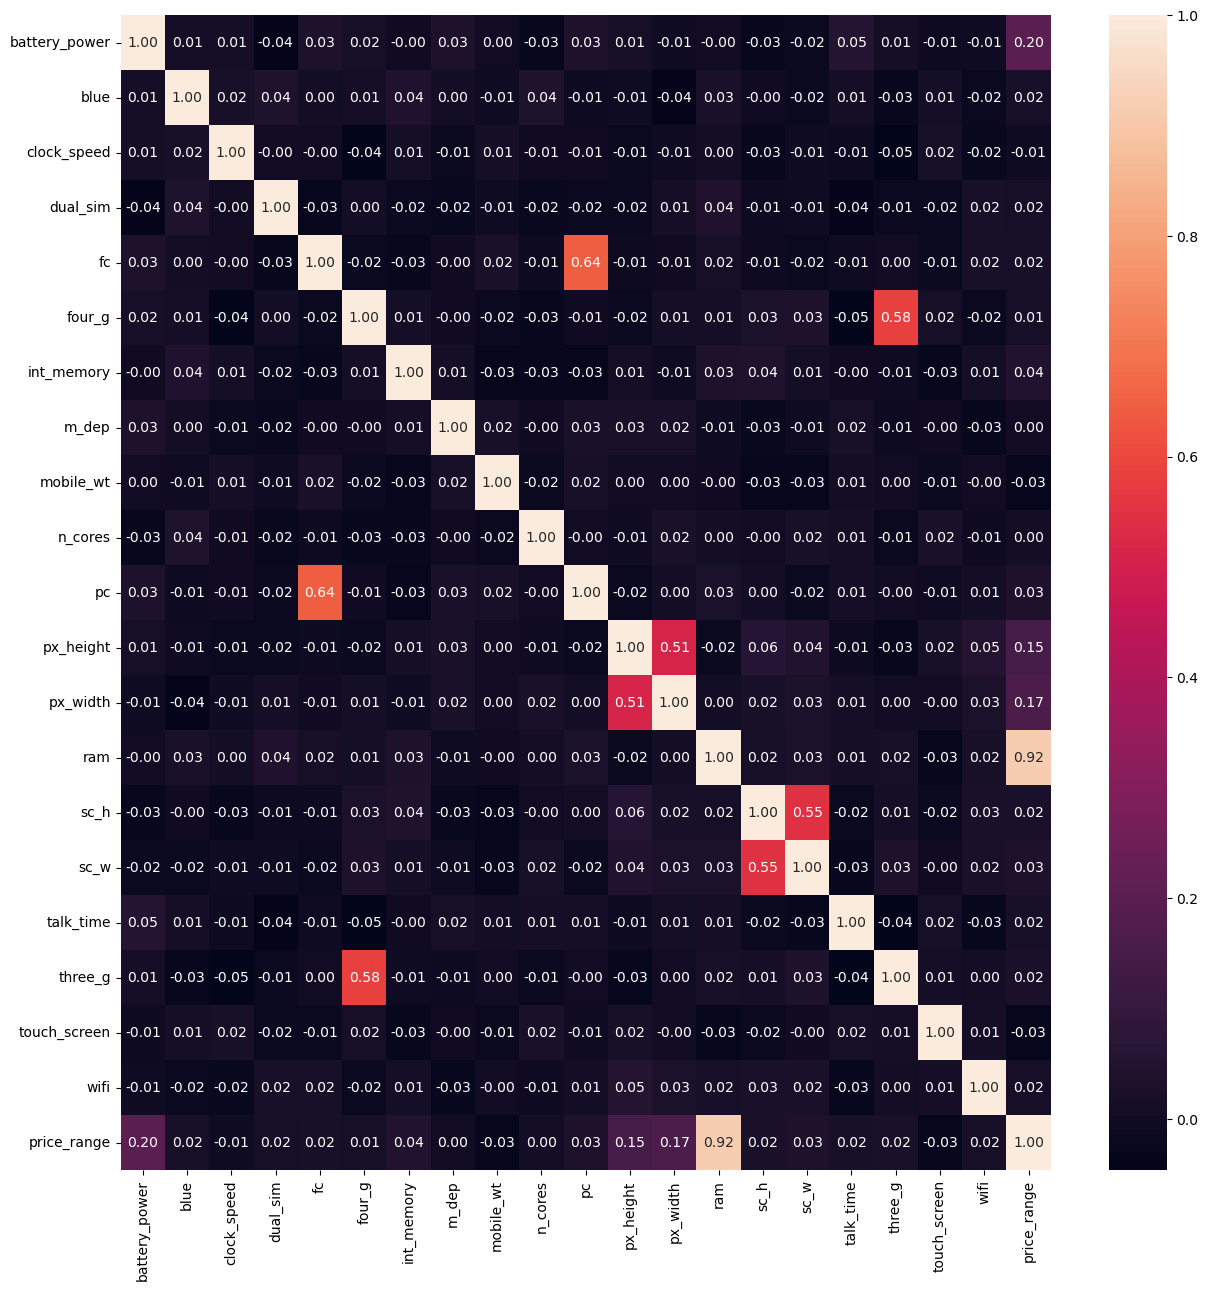

In [18]:
cor = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True, fmt='.2f')

In the above correlation matrix we do not see any highly correlated feautures except from ram which we consider it as rational and not as a leakage clue.



Now we are going to split our dataset to categorical and numerical so as to make the vizualization more readable.

In [20]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [21]:
df_categorical = df[['price_range', 'blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']]
df_numerical_target = df.drop(df_categorical.columns[1:], axis=1)

In [22]:
df_categorical.rename(columns={'price_range': 'Price Range',
 'blue': 'Bluetooth',
 'dual_sim' : 'Dual Sim',
 'four_g' : '4G',
 'n_cores': 'Number of Cores',
 'three_g' : '3G',
 'touch_screen': 'Touch Screen',
 'wifi' : 'Wi-Fi'}, inplace=True)

C:\Users\30698\AppData\Local\Temp\ipykernel_12380\2452211629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.rename(columns={'price_range': 'Price Range',


In [24]:
df_numerical_target.rename(columns={'battery_power':'Battery Power',
 'clock_speed': 'Clock Speed',
 'fc': 'Front Camera (mp)',
 'int_memory': 'Internal Memory (GB)',
 'm_dep' : 'Mobile Depth (cm)',
 'mobile_wt' : 'Mobile Weight' ,
 'pc' : 'Primary Camera (mp)',
 'px_height' : 'Pixel Resolution Height',
 'px_width' :'Pixel Resolution Width',
 'ram': 'RAM',
 'sc_h': 'Screen Height (cm)',
 'sc_w': 'Screen Width (cm)',
 'talk_time' : 'Talk Time',
 'price_range': 'Price Range'}, inplace=True)

C:\Users\30698\AppData\Local\Temp\ipykernel_12380\810634484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['Price Range'].replace(to_replace = [0,1,2,3],value = ['Low cost','Medium cost', 'High cost', 'Very high cost'], inplace = True)


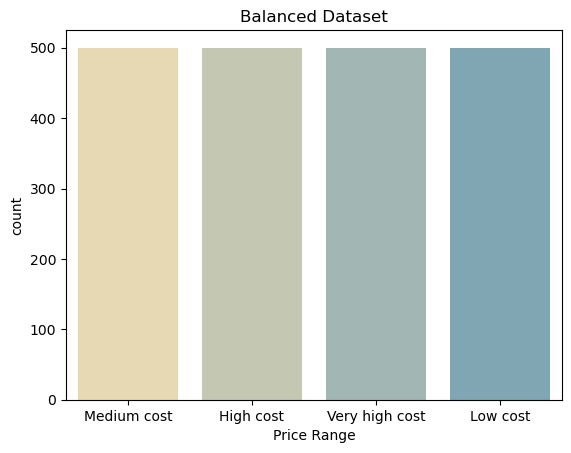

In [23]:
df_categorical['Price Range'].replace(to_replace = [0,1,2,3],value = ['Low cost','Medium cost', 'High cost', 'Very high cost'], inplace = True)
palette = sns.color_palette("blend:#7AB,#EDA",n_colors=4)
palette.reverse()
g=sns.countplot(x = df_categorical['Price Range'], hue = df_categorical['Price Range'], palette=palette, legend=False)
g.set(title ='Balanced Dataset')
None

In [25]:
list_cat_features = list(df_categorical.columns)
list_num_target_features = list(df_numerical_target.columns)

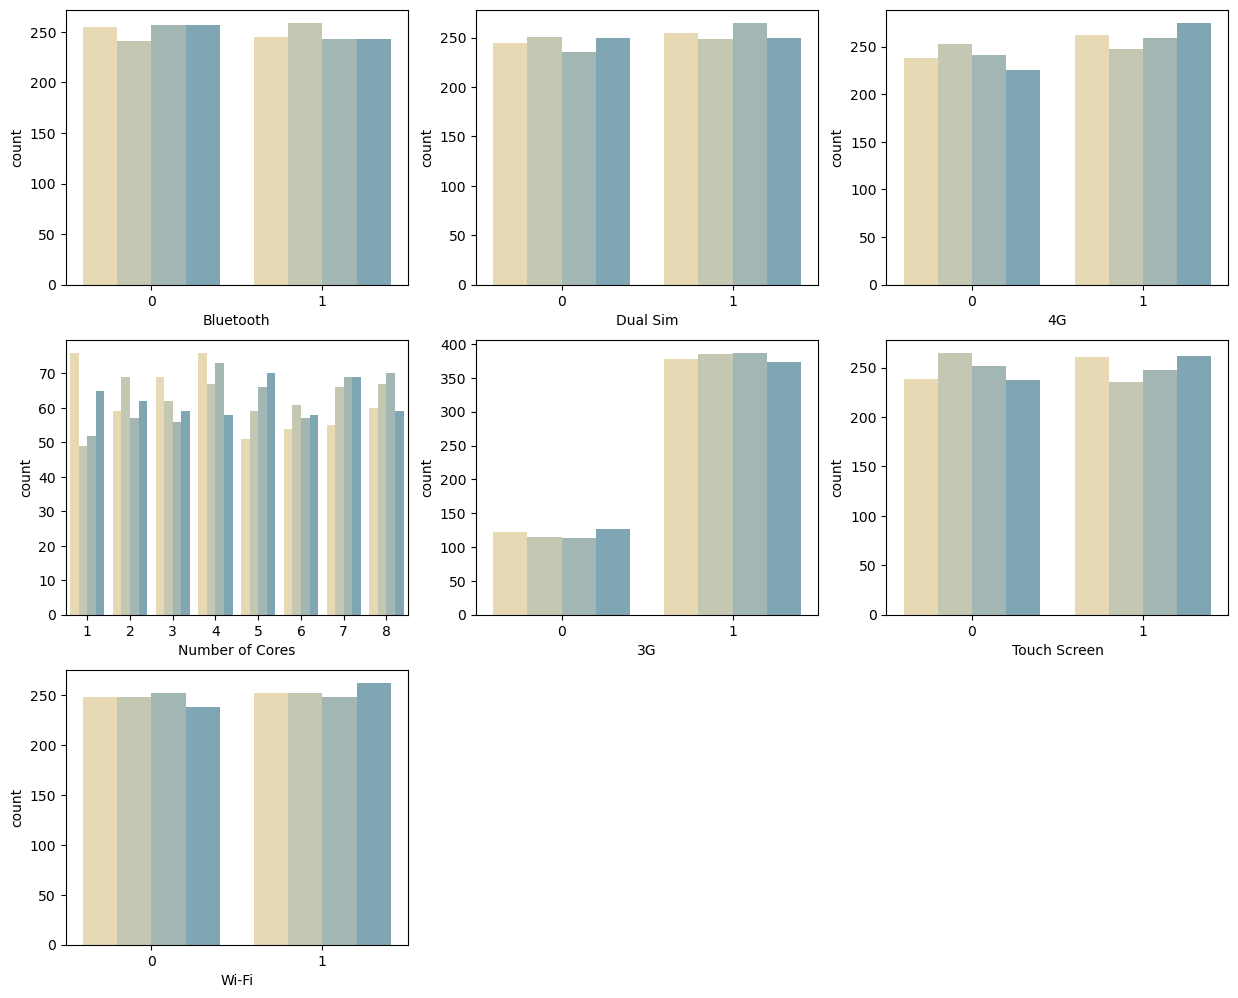

In [31]:
# Caterorical Features Analysis
i = 1
plt.figure(figsize = (15,25))
for feature in list_cat_features[1:]:
    plt.subplot(6,3,i)
    palette = sns.color_palette("blend:#7AB,#EDA",n_colors=4)
    palette.reverse()
    sns.countplot(x = feature , data = df_categorical, hue = 'Price Range', palette=palette, legend=None)
    i +=1

Most of the features are balanced
</br>There is an imbalance of phones equipped with 3g

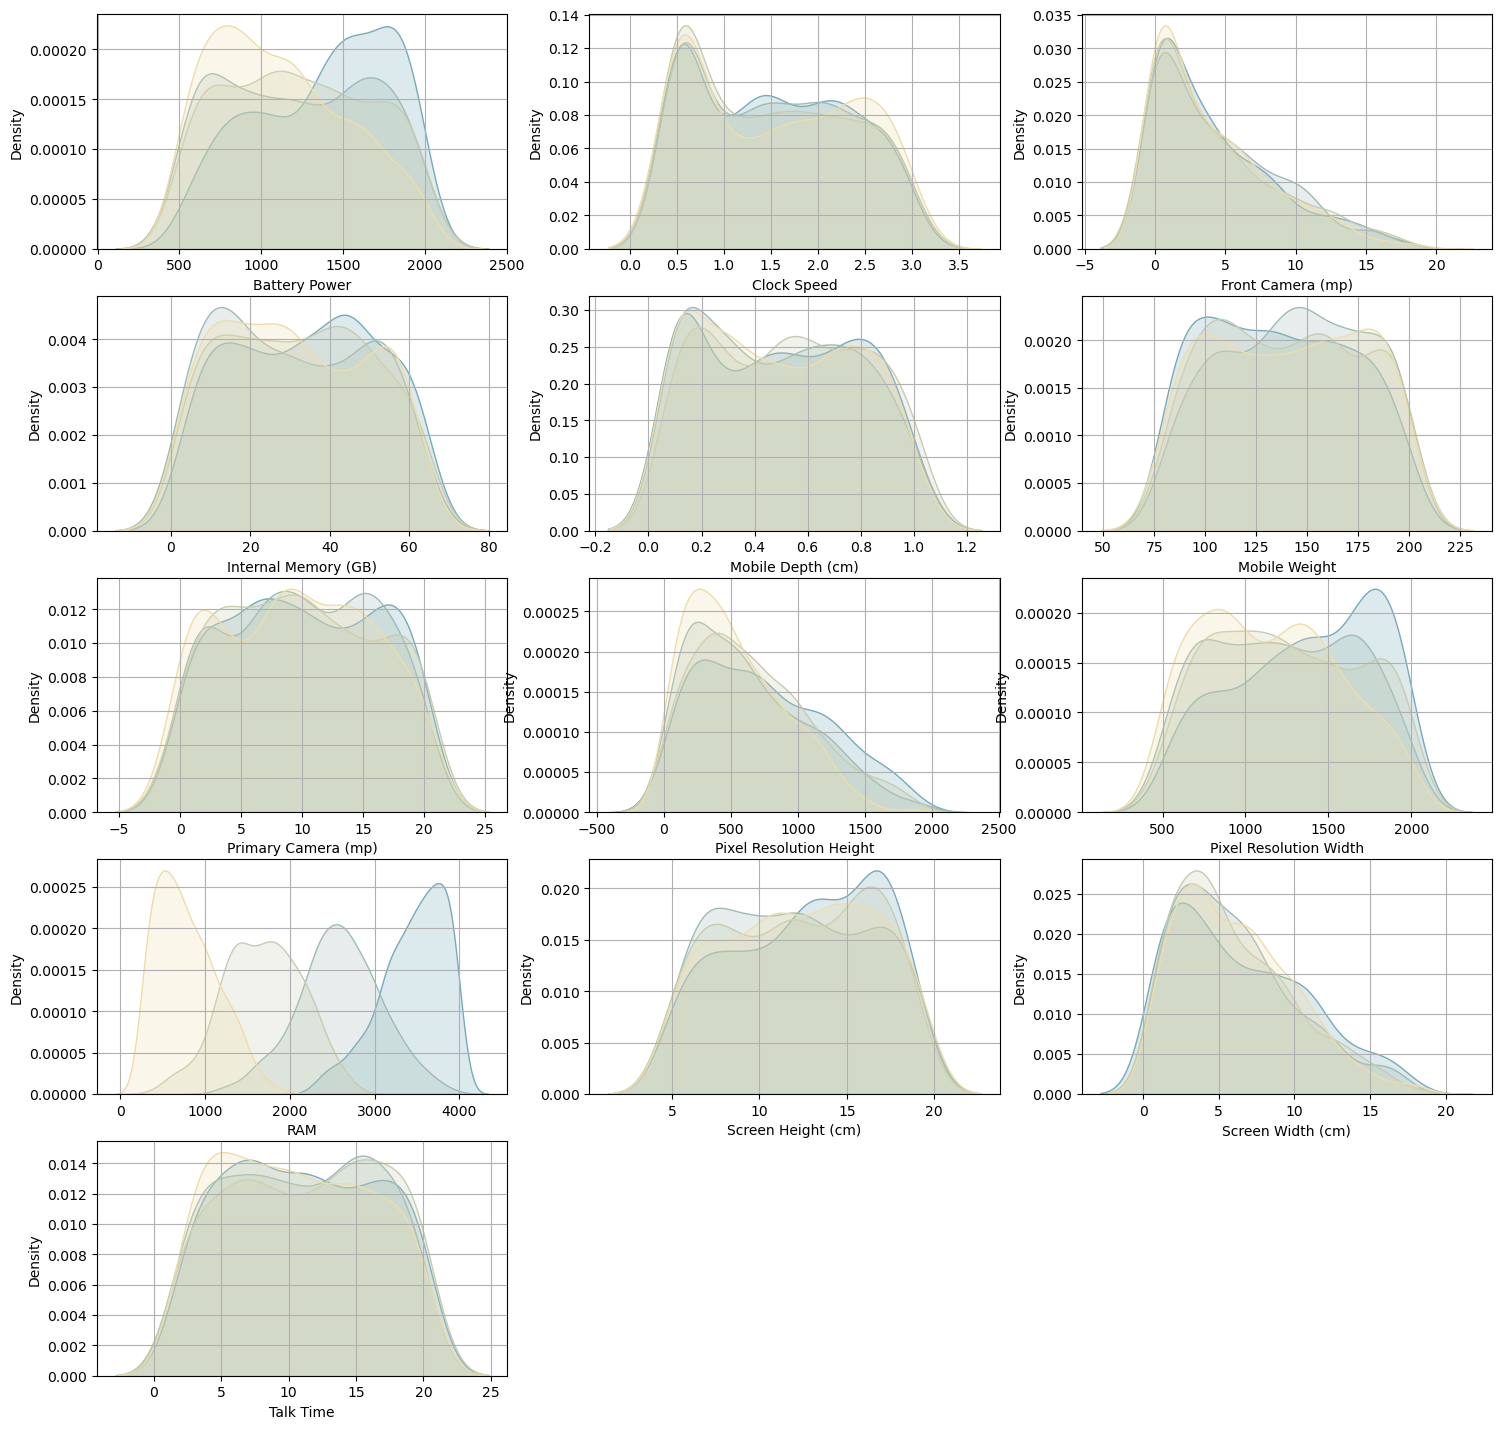

In [32]:
# Numerical Features Analysis
i = 1
plt.figure(figsize = (18,25))
for feature in list_num_target_features[:-1]:
    plt.subplot(7,3,i)
    plt.grid()
    palette = sns.color_palette("blend:#7AB,#EDA",n_colors=4)
    palette.reverse()
    sns.kdeplot(x = feature , data = df_numerical_target, hue = 'Price Range', fill = True, palette=palette, legend=False)
    i +=1

The target seems to changing according to the Battery Power, RAM and Pixel Resolution Width features.
